# Namespace

Sınıfları tanıtmadan önce, Python’un kapsam (scope) kuralları hakkında bilgi edinilmesi yarar sağlar. Sınıf tanımları, ad (name) alanlarıyla ilişkilidir. Arka planda nelerin çalıştığını tam olarak anlamak için kapsamların (scopes) ve ad alanlarının nasıl çalıştığı bilinmesi gerekir. Bu konu hakkındaki bilgi, herhangi bir Python programcısı için yararlıdır.

## Name Kavramı

Python'da name yani ad kavramını daha önce görmüştük. Fakat tekrar etmekte fayda olacaktır.

Python'da her varlık aslında bir nesne (object) dir. Ad (name) ile nesneler erişiriz.

In [1]:
sayi=2 

Yukarıdaki atama yapıldığında, bellekte bir nesne tanımlanır ve buraya depolanır. Bu nesne "sayi" ile ilişkilendirilir.

Bizler id() fonksiyonu ile nesnelerin bellekte tutulduğu adresleri öğrenebiliriz.

In [2]:
id(sayi) # id, RAM üzerinde kayıtlı olan kimliğini verir.

140722407773000

In [3]:
id(2)

140722407773000

id(sayi) ve id(2) aynı kimlik numaralarına sahiptirler. (Bu konuyu "is" parametresinde işlemiştik, "is" parametresi id değerlerini karşılaştırıp, bu iki değer aynı ise True değeri döndürüyordu)

In [13]:
2 is sayi

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\mukir\AppData\Local\Temp/ipykernel_19196/1699108168.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  2 is sayi


True

In [4]:
sayi = 5 # Python bir nesne oluşturdu. sayi adı bununla ilişkilendirildi.
print('id(sayi) =', id(sayi))
print('id(5) =', id(5))

sayi = sayi+1 # Python yeni bir nesne oluşturdu. sayi adı bununla yeniden ilişkilendirildi.

print('id(sayi) =', id(sayi))

print('id(6) =', id(6))
 
sayi2 = 5 #sayi2 = 5 dediğiimzde, yeni sayi2 ismi önceki nesne 5 ile ilişkilendirilir.
 

print('id(sayi2) =', id(sayi2))

print('id(5) =', id(5))

id(sayi) = 140722407773096
id(5) = 140722407773096
id(sayi) = 140722407773128
id(6) = 140722407773128
id(sayi2) = 140722407773096
id(5) = 140722407773096


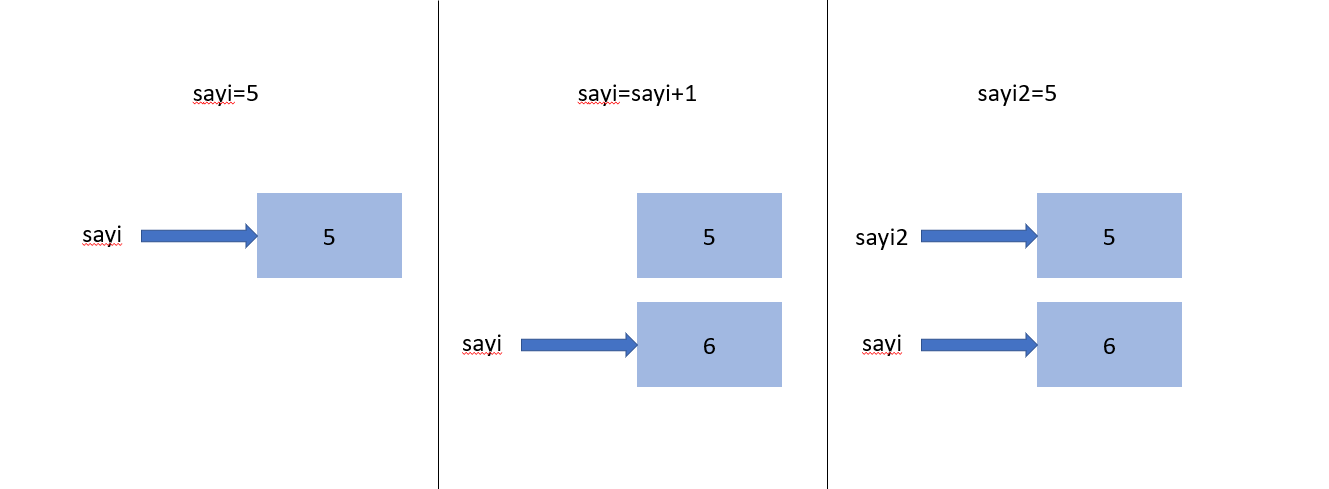

Başlangıçta bir nesne "5" oluşturulur ve "sayi" adı onunla ilişkilendirilir, sayi = sayi+1 değiğimizde  yeni bir nesne "6" oluşturulur ve "sayi" bu nesneyle ilişkilidir.

id(sayi)ve id(6) aynı değerlere sahiptir.

sayi2 = 5 çalıştırıldığında yeni sayi2 adı önceki nesne "5" ile ilişkilendirilir.

Python'un yeni bir yinelenen nesne oluşturması gerekmez. Ad bağlamanın bu dinamik doğası Python'u güçlü kılar; bir isim herhangi bir tür nesneyi ifade edebilir.


Python yeni bir yinelenen nesne oluşturmaz. Bu yüzden Python güçlüdür. Çünkü herhangi bir ad herhangi bir nesne türünü ifade edebilir.

In [11]:
 
nesne = 5
print(id(nesne))
nesne = 'Selam'
print(id(nesne))
nesne = [1,2,3]
print(id(nesne))
 

140714335610784
2054762947696
2054762558080


**Önemli** Fonksiyonlar da bir nesnedir.

In [13]:
def selamla():
    return "Merhaba"

a=selamla()

print(id(a))
print(id(selamla()))

2054762949296
2054762949296


# Namespace kavramı

Ad alanı veya Namespace bir isim(name) koleksiyonudur. Ya da isimlerden nesnelere yapılan bir eşleşmedir. Çoğu ad alanı şu anda Python sözlükleri olarak uygulanmaktadır. Ad alanları şunlardır:

1. Built-in (yerleşik) adlar(örneğin abs(), len() fonksiyonları ya da yerleşik exception isimleri)
2. Bir modüldeki global isimler.
3. Bir fonksiyondaki yerel isimlerdir

Bir anlamda, bir nesnenin nitelik kümesi de bir ad alanını oluşturur. 

Ad alanları hakkında bilinmesi gereken önemli şey, **farklı ad alanlarındaki adlar arasında kesinlikle hiçbir ilişki olmamasıdır.** 

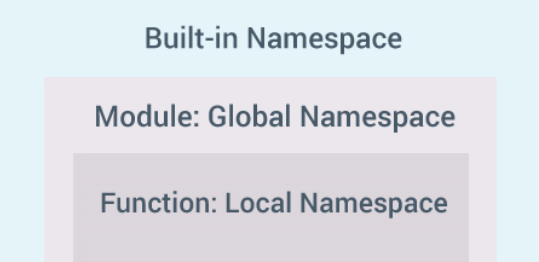

## Kelime (word) kavramı

Bir noktanın ardından gelen herhangi bir isme "nitelik" (attribute) denir. Örneğin, z.real ifadesinde, real z nesnesinin bir niteliğidir (attribute). Açıkçası, modüllerdeki isimlere yapılan atıflar öznitelik referanslarıdır: modname.funcname ifadesinde, modname bir modül nesnesidir ve funcname bunun bir özniteliğidir. Bu durumda, modülün öznitelikleri ile modülde tanımlanan global isimler arasında basit bir eşleştirme olur: aynı isim alanını paylaşırlar.

## Ad alanlarının oluşturulması

Ad alanları farklı anlarda oluşturulur ve farklı yaşam sürelerine sahiptir. Yerleşik adları içeren ad alanı, Python yorumlayıcısı başladığında oluşturulur ve asla silinmez. Bir modül için global ad alanı, modül tanımı okunduğunda oluşturulur; normalde, modül ad alanları da yorumlayıcı kapanana kadar sürer. Yorumlayıcının üst düzey çağrısı tarafından yürütülen, bir komut dosyasından okunan veya etkileşimli olarak yürütülen ifadeler, __main__ adlı bir modülün parçası olarak kabul edilir, bu nedenle kendi genel ad alanlarına sahiptirler. (Yerleşik isimler aslında bir modülde de yaşar; buna yerleşikler denir.)

Bir fonksiyonun yerel (local) ad alanı, fonksiyon çağrıldığında oluşturulur ve fonksiyon içinde işlenmeyen bir istisna döndürdüğünde veya ortaya çıkardığında silinir. Elbette, rekürsif çağrıların her birinin kendi yerel ad alanı vardır.

## Scope Kavramı

Kapsam (scope), bir ad alanına doğrudan erişilebilen bir Python programının metinsel bir bölgesidir. Buradaki "doğrudan erişilebilir", bir ad için niteliksiz bir referansın ad alanında adı bulmaya çalıştığı anlamına gelir.

Kapsamlar statik olarak belirlenmesine rağmen dinamik olarak kullanılırlar. Yürütme sırasında herhangi bir zamanda, ad alanlarına doğrudan erişilebilen 3 veya 4 iç içe kapsam (scope) vardır:

1. İlk aranan en iç kapsamdır. Yerel isimleri içerir.

2. En yakın çevreleyen kapsamdan başlayarak aranan tüm çevreleyen fonksiyonların kapsamları yerel olmayan, ancak aynı zamanda küresel olmayan adlar içerir.

3. Bir sonraki kapsam, geçerli modülün genel adlarını içerir

4. En dıştaki kapsam (en son aranan) yerleşik (built-in) isimleri içeren ad alanıdır.

Bir isim global olarak bildirilirse, tüm referanslar ve atamalar doğrudan modülün global adlarını içeren orta kapsama gider. En iç kapsamın dışında bulunan değişkenleri yeniden bulmak için yerel olmayan ifade kullanılabilir; yerel olmayan olarak tanımlanmadıysa, bu değişkenler salt okunurdur (böyle bir değişkene yazma girişimi, en içteki kapsamda yeni bir yerel değişken yaratır ve aynı adlandırılmış dış değişkeni değiştirmeden bırakır).


Genellikle, yerel kapsam, mevcut fonksiyonun (metinsel olarak) yerel adlarına başvurur. Fonksiyonların dışında, yerel kapsam, genel kapsam ile aynı ad alanına başvurur: modülün ad alanı. Sınıf tanımları, yerel kapsamda başka bir ad alanı daha yerleştirir.


Kapsamların metinsel olarak belirlendiğini anlamak önemlidir: Bir modülde tanımlanan bir fonksiyonun genel kapsamı, fonksiyonun nereden veya hangi takma adla çağrıldığına bakılmaksızın, o modülün isim alanıdır. Öte yandan, asıl ad araması çalışma zamanında dinamik olarak yapılır - ancak, dil tanımı "derleme" zamanında statik ad çözümlemesine doğru gelişmektedir, bu nedenle dinamik ad çözümlemesine güvenmeyin! (Aslında, yerel değişkenler zaten statik olarak belirlenmiştir.)


Python'un özel bir tuhaflığı - eğer hiçbir global ya da yerel olmayan ifade geçerli değilse - adlara yapılan atamaların her zaman en iç kapsama girmesidir. Atamalar verileri kopyalamaz - sadece nesnelere isimleri bağlarlar. Aynısı silme işlemleri için de geçerlidir: del x ifadesi, x'in yerel kapsam tarafından başvurulan ad alanından bağlanmasını kaldırır. Aslında, yeni adlar tanıtan tüm işlemler yerel kapsamı kullanır: özellikle, içe aktarma ifadeleri ve fonksiyon tanımları modülü veya fonksiyon adını yerel kapsamda bağlar.


Global ifade, belirli değişkenlerin global kapsamda yaşadığını ve orada geri dönmesi gerektiğini belirtmek için kullanılabilir; yerel olmayan ifade, belirli değişkenlerin çevreleyen bir kapsamda yaşadığını ve burada geri dönmesi gerektiğini belirtir.

In [ ]:
degisken = "xxx"
def kapsam_testi():
    def yerelde_yap():
        degisken = "local degisken"
        print("yerelde yap çalıştı,  değişken içeriği:", degisken)
        

    def yerel_olmayanda_yap():
        nonlocal degisken
        degisken = "nonlocal degisken"
        print("yerel olmayanda yap çalıştı,  değişken içeriği:", degisken)

    def globaldeyap():
        global degisken
        degisken = "global degisken"
        print("globalde yap çalıştı,  değişken içeriği:", degisken)

    degisken = "test degisken"
    yerelde_yap()
    print("Yerel atamadan sonra:", degisken,"degisken id=",id(degisken))
    yerel_olmayanda_yap()
    print("Yerel olmayan atamadan sonra:", degisken)
    globaldeyap()
    print("Global atamadan sonra:", degisken)
    
print(degisken)
kapsam_testi()
print("Global Kapsam:", degisken)

Yerel atamanın (varsayılan olan), kapsam_testi() nin "degisken" bağlantısını nasıl değiştirmediğine dikkat edin. Yerel olmayan (nonlocal) atama, kapsam_testi()nin "degisken" bağlantısını değiştirdi ve genel(global) atama, modül düzeyinde bağlanmayı değiştirdi.

Ayrıca, genel atamadan önce spam için daha önce bir bağlanma olmadığını da görebilirsiniz.

In [2]:
x = "global scope"
def outer_func():
    x = "outer func scope"
    def local_func():
        x = "local func scope"
        print("local_worked:", x)
        
    def nonlocal_func():
        nonlocal x
        x = "outer func scope changed"
        print("nonlocal_worked:", x)

    def global_func():
        global x
        x = "global scope changed"
        print("global_worked:", x)

    local_func()
    print("After local_func:", x)
    nonlocal_func()
    print("After nonlocal_func:", x)
    global_func()
    print("After global_func:", x)
    
print(x)
outer_func()
print("Global:", x)

global scope
local_worked: local_func_scope
After local_func: outer func scope
nonlocal_worked: outer func scope changed
After nonlocal_func: outer func scope changed
global_worked: global scope changed
After global_func: outer func scope changed
Global: global scope changed


In [3]:
x = 10

def my_function():
    print(x)

my_function()

10


In [5]:
def my_function():
    a = 10
    print(a)

my_function()
print(a) #Gives error, a is defined out of global scope!

10


NameError: name 'a' is not defined

In [8]:
def outer_function():
    x = 1

    def inner_function():
        
        x = 5
        print(x)

    inner_function()

    print(x)

outer_function()

5
1


In [9]:
from enum import Enum

class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3

In [10]:
if light.color == Color.RED:
    print("Stop")
elif light.color == Color.GREEN:
    print("Go")
else:
    print("Yellow")

NameError: name 'light' is not defined

In [8]:
x = 10
def func():
    global x
    y =10
    x = x+5
    print(x)

func()

15


In [9]:
len("hasdjgasj")

9

NameError: name 'y' is not defined